In [127]:
student_id = "47861533"

### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>


 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
df = pd.read_csv('/Users/navneetwarraich/Documents/The E-commerce Dataset.csv')
display(df)
print(df.shape)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


(20000, 11)


In [9]:
df2 = df.isnull().sum()
print (df2)

userId          0
timestamp       0
review          0
item            0
rating         17
helpfulness    22
gender         27
category        0
item_id         0
item_price      0
user_city       0
dtype: int64


In [130]:
df_clean = df.dropna(subset=['gender', 'rating', 'helpfulness'])
df_clean = df_clean[df_clean["review"] != 'none']

display(df_clean)
print(df_clean.shape)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


(19916, 11)


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [51]:
# Q2.1
print("unique users=", df_clean["userId"].unique().size)
print("unique reviews=", df_clean["review"].unique().size)
print("unique item=", df_clean["item"].unique().size)
print("unique category=", df_clean["category"].unique().size)

unique users= 8562
unique reviews= 19459
unique item= 89
unique category= 9


In [25]:
# Q2.2
df_clean['rating'].describe()

count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [113]:
# Q2.3 step 1
df_clean.groupby("gender").count()["item"]

gender
F     9793
M    10123
Name: item, dtype: int64

In [114]:
# Q2.3 step 2
df_clean.groupby("gender").describe()

userId                                                         \
          count         mean          std  min     25%     50%     75%   
gender                                                                   
F        9793.0  5533.094149  3324.559586  0.0  2048.0  5909.0  8363.0   
M       10123.0  5465.210313  3363.293294  2.0  1934.0  5880.0  8423.0   

                timestamp                ... item_price        user_city  \
            max     count          mean  ...        75%    max     count   
gender                                   ...                               
F       10805.0    9793.0  59167.472378  ...      126.5  149.0    9793.0   
M       10808.0   10123.0  58824.663835  ...      126.5  149.0   10123.0   

                                                          
             mean        std  min  25%   50%   75%   max  
gender                                                    
F       19.361789  11.719459  0.0  9.0  19.0  30.0  39.0  
M       19.442952  11.537247  0.0  9.0  19.0  29.0  39.0  

[2 rows x 56 columns]

In [117]:
#2.4 step 1
df_clean.groupby("item").count()["rating"]

item
AOL (America Online)     939
All Advantage            657
Alta Vista (by 1stUp)    157
Amazon.com               240
American Airlines        185
                        ... 
Wendy's                  210
What Lies Beneath        160
X-Men                    245
X.com                    173
eBay                     596
Name: rating, Length: 89, dtype: int64

In [122]:
#2.4 step 2
df_clean.groupby("item").describe()

userId                                            \
                       count         mean          std    min      25%   
item                                                                     
AOL (America Online)   939.0  4953.105431  3452.151140    3.0  1576.00   
All Advantage          657.0  5670.324201  3229.251863   19.0  2330.00   
Alta Vista (by 1stUp)  157.0  6201.560510  3121.087701  135.0  4387.00   
Amazon.com             240.0  6741.891667  2567.480568   61.0  5084.25   
American Airlines      185.0  6306.794595  3104.162661   29.0  4706.00   
...                      ...          ...          ...    ...      ...   
Wendy's                210.0  5437.338095  3196.537088   16.0  2075.75   
What Lies Beneath      160.0  4818.318750  3580.823140   13.0  1308.50   
X-Men                  245.0  4707.436735  3455.392787    7.0  1257.00   
X.com                  173.0  5564.843931  3342.320807   54.0  2018.00   
eBay                   596.0  6141.778523  3227.449915   33.0  4245.00   

                                                timestamp                ...  \
                          50%      75%      max     count          mean  ...   
item                                                                     ...   
AOL (America Online)   5071.0  7996.50  10787.0     939.0  55128.069223  ...   
All Advantage          6029.0  8470.00  10763.0     657.0  46504.404871  ...   
Alta Vista (by 1stUp)  6742.0  8667.00  10717.0     157.0  61287.675159  ...   
Amazon.com             6699.5  8981.50  10736.0     240.0  66649.350000  ...   
American Airlines      6851.0  8852.00  10762.0     185.0  59329.837838  ...   
...                       ...      ...      ...       ...           ...  ...   
Wendy's                5981.0  7980.00  10805.0     210.0  68063.814286  ...   
What Lies Beneath      4877.0  8217.75  10770.0     160.0  72731.512500  ...   
X-Men                  4890.0  7912.00  10779.0     245.0  78995.648980  ...   
X.com                  6162.0  8451.00  10759.0     173.0  35089.000000  ...   
eBay                   6595.5  8908.75  10799.0     596.0  59018.154362  ...   

                      item_price         user_city                             \
                             75%     max     count       mean        std  min   
item                                                                            
AOL (America Online)      145.84  145.84     939.0  19.804047  11.698046  0.0   
All Advantage              23.08   23.08     657.0  20.318113  11.328958  0.0   
Alta Vista (by 1stUp)      46.63   46.63     157.0  18.949045  11.396579  0.0   
Amazon.com                129.82  129.82     240.0  19.966667  11.287371  0.0   
American Airlines          61.00   61.00     185.0  19.664865  11.826008  0.0   
...                          ...     ...       ...        ...        ...  ...   
Wendy's                    69.00   69.00     210.0  18.509524  11.102929  0.0   
What Lies Beneath         145.00  145.00     160.0  18.075000  11.723518  0.0   
X-Men                      66.39   66.39     245.0  18.493878  11.125079  0.0   
X.com                      93.55   93.55     173.0  18.115607  12.126199  0.0   
eBay                      149.00  149.00     596.0  19.798658  12.040397  0.0   

                                                 
                         25%   50%    75%   max  
item                                             
AOL (America Online)   10.00  20.0  30.00  39.0  
All Advantage          11.00  21.0  30.00  39.0  
Alta Vista (by 1stUp)   9.00  20.0  29.00  39.0  
Amazon.com              9.00  20.0  31.00  39.0  
American Airlines       9.00  20.0  30.00  39.0  
...                      ...   ...    ...   ...  
Wendy's                 9.00  19.0  27.00  39.0  
What Lies Beneath       7.75  16.0  27.25  39.0  
X-Men                   9.00  18.0  27.00  39.0  
X.com                   7.00  17.0  29.00  39.0  
eBay                    9.00  19.5  31.00  39.0  

[89 rows x 56 columns]

#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

In [45]:
# your code and solutions
df_clean

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


Both the genders are equal in relation to their ratings amongst items while both hold outliers. The boxplot is also asymmetrical.


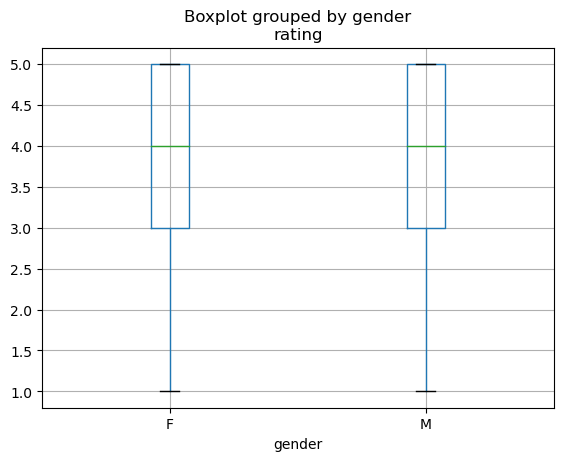

In [123]:
df_clean.boxplot("rating", by = "gender")

print("Both the genders are equal in relation to their ratings amongst items while both hold outliers. The boxplot is also asymmetrical.")

The boxplots between helpfulness and rating, the most commonly used rating is 2.0 in regards to helpfulness


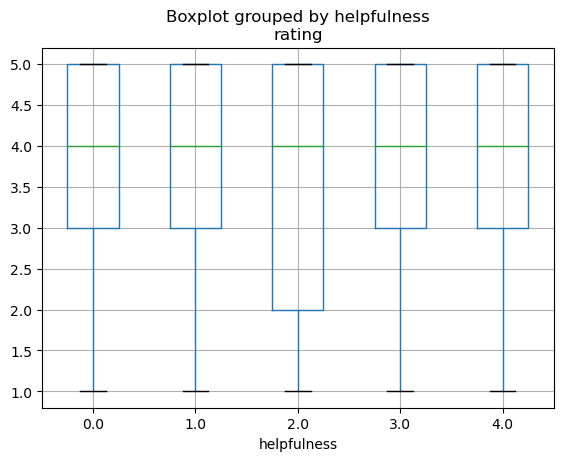

In [124]:
df_clean.boxplot("rating", by = "helpfulness")
print("The boxplots between helpfulness and rating, the most commonly used rating is 2.0 in regards to helpfulness")

The boxplot below portrays that the category of media got the lowest ratings as its max at 4.0. The category of books however, received zero ratings.


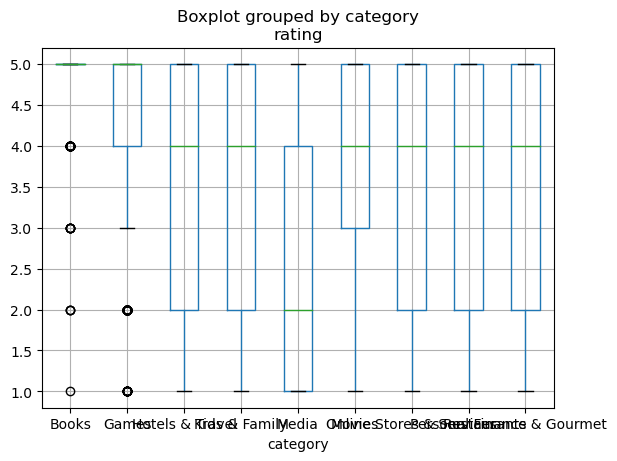

In [125]:
df_clean.boxplot("rating", by = "category")

print("The boxplot below portrays that the category of media got the lowest ratings as its max at 4.0. The category of books however, received zero ratings.")

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [84]:
# your code and solutions
df_clean

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [134]:
df_clean2 = df_clean[
    (df_clean['helpfulness'] >= 2) & 
    (df_clean.groupby('userId')['item'].transform('count') > 7) & 
    (df_clean.groupby('item')['userId'].transform('count') > 11)]
display(df_clean2)
print(df_clean2.shape)

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
61,4077,81000,Spedia: An Honest Opinion,Spedia,2.0,3.0,F,Online Stores & Services,70,58.32,29
62,4077,112499,AOL: AOHELL,AOL (America Online),2.0,4.0,F,Online Stores & Services,0,145.84,29
63,4077,112599,AOL= AOSPAM,AOL (America Online),1.0,4.0,F,Online Stores & Services,0,145.84,29
65,4077,120299,"MyPoints: Easy to Use, Awesome Rewards!!!!!!",MyPoints.com,5.0,4.0,F,Online Stores & Services,43,72.00,29
66,4077,120499,Dreamcast: Video Game Heaven,Sega Dreamcast Grey Console,5.0,4.0,F,Games,62,62.00,29
...,...,...,...,...,...,...,...,...,...,...,...
19983,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
19985,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
19988,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
19989,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


(3118, 11)
